# Job Placement Data

In [2]:
#code123
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Phase 1: My Questions
    How can I build a machine learning model that can predict whether a candidate will be placed or not?

In [13]:
placement_information = pd.read_csv('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')
placement_information = placement_information.rename(
    columns =
        {
        'sl_no': 'serial_#',
        'ssc_p': 'Secondary Education Percentage 10th',
        'ssc_b': 'Secondary Board of Education - Central/Others',
        'hsc_p': 'Higher Secondary Education Percentage 12th',
        'hsc_b': 'Higher Board of Education - Central/Others',
        'hsc_s': 'Specialization in Higher Secondary Education',
        'degree_p': 'Degree Percentage complete',
        'degree_t': 'Undergraduate degree type',
        'workex': 'Work Experience',
        'etest_p': 'Employability test percentage',
        'specialisation': 'Post Graduation(MBA)- Specialization',
        'mba_p': 'MBA percentage',
        'status': 'Status of placement'
})
placement_information = placement_information.drop(['serial_#'], axis=1)
placement_information.salary = placement_information.salary.fillna(0)
placement_information

,gender,Secondary Education Percentage 10th,Secondary Board of Education - Central/Others,Higher Secondary Education Percentage 12th,Higher Board of Education - Central/Others,Specialization in Higher Secondary Education,Degree Percentage complete,Undergraduate degree type,Work Experience,Employability test percentage,Post Graduation(MBA)- Specialization,MBA percentage,Status of placement,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [14]:
placement_information['gender'] = placement_information['gender'].astype('category')
placement_information['Status of placement'] = placement_information['Status of placement'].astype('category')
placement_information['Secondary Board of Education - Central/Others'] = placement_information['Secondary Board of Education - Central/Others'].astype('category')
placement_information['Higher Board of Education - Central/Others'] = placement_information['Higher Board of Education - Central/Others'].astype('category')
placement_information['Specialization in Higher Secondary Education'] = placement_information['Specialization in Higher Secondary Education'].astype('category')
placement_information['Undergraduate degree type'] = placement_information['Undergraduate degree type'].astype('category')
placement_information['Work Experience'] = placement_information['Work Experience'].astype('category')
placement_information['Post Graduation(MBA)- Specialization'] = placement_information['Post Graduation(MBA)- Specialization'].astype('category')
placement_information.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   gender                                         215 non-null    category
 1   Secondary Education Percentage 10th            215 non-null    float64 
 2   Secondary Board of Education - Central/Others  215 non-null    category
 3   Higher Secondary Education Percentage 12th     215 non-null    float64 
 4   Higher Board of Education - Central/Others     215 non-null    category
 5   Specialization in Higher Secondary Education   215 non-null    category
 6   Degree Percentage complete                     215 non-null    float64 
 7   Undergraduate degree type                      215 non-null    category
 8   Work Experience                                215 non-null    category
 9   Employability test percentage              

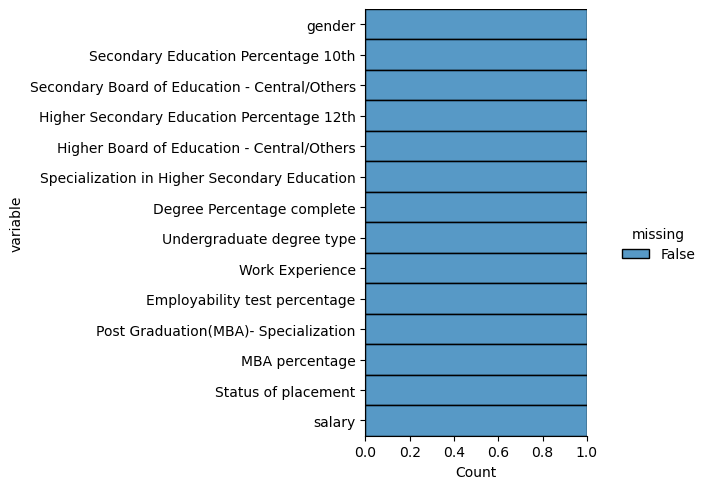

In [15]:
import seaborn as sns
sns.displot(
    data=placement_information.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [16]:
placement_information.isna().sum()

gender                                           0
Secondary Education Percentage 10th              0
Secondary Board of Education - Central/Others    0
Higher Secondary Education Percentage 12th       0
Higher Board of Education - Central/Others       0
Specialization in Higher Secondary Education     0
Degree Percentage complete                       0
Undergraduate degree type                        0
Work Experience                                  0
Employability test percentage                    0
Post Graduation(MBA)- Specialization             0
MBA percentage                                   0
Status of placement                              0
salary                                           0
dtype: int64

In [17]:
placement_information1 = placement_information.loc[placement_information.notna().all(axis='columns')]

<Axes: ylabel='Density'>

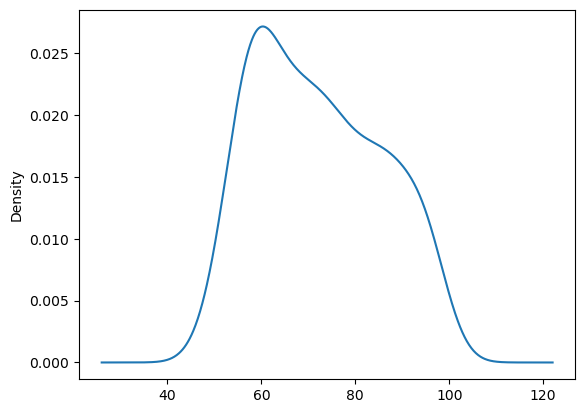

In [21]:
employability_scaler = StandardScaler().fit_transform(placement_information1[['Employability test percentage']])
placement_information1['Employability test percentage'].plot.density()

<Axes: ylabel='Density'>

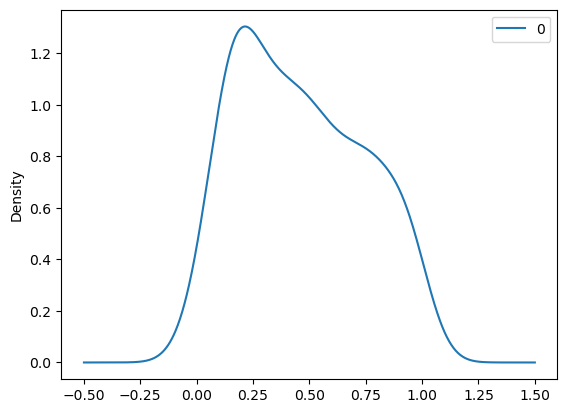

In [30]:
employability_normalizing = MinMaxScaler().fit_transform(placement_information1[['Employability test percentage']])
pd.DataFrame(employability_normalizing).plot.density()

In [32]:
numbers_listing = list(placement_information1.select_dtypes('number')) #select function to find the numeric variables and create a list  

placement_information1[numbers_listing] = MinMaxScaler().fit_transform(placement_information1[numbers_listing])
placement_information1

,gender,Secondary Education Percentage 10th,Secondary Board of Education - Central/Others,Higher Secondary Education Percentage 12th,Higher Board of Education - Central/Others,Specialization in Higher Secondary Education,Degree Percentage complete,Undergraduate degree type,Work Experience,Employability test percentage,Post Graduation(MBA)- Specialization,MBA percentage,Status of placement,salary
0,M,0.538240,Others,0.889621,Others,Commerce,0.195122,Sci&Tech,No,0.104167,Mkt&HR,0.284483,Placed,0.287234
1,M,0.792414,Central,0.680890,Others,Science,0.670244,Sci&Tech,Yes,0.760417,Mkt&Fin,0.564843,Placed,0.212766
2,M,0.497011,Central,0.510708,Central,Arts,0.341463,Comm&Mgmt,No,0.520833,Mkt&Fin,0.247001,Placed,0.265957
3,M,0.311482,Central,0.247117,Central,Science,0.048780,Sci&Tech,No,0.333333,Mkt&HR,0.308096,Not Placed,0.000000
4,M,0.925788,Central,0.602965,Central,Commerce,0.568293,Comm&Mgmt,No,0.975000,Mkt&Fin,0.160795,Placed,0.452128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,0.818594,Others,0.741351,Others,Commerce,0.673171,Comm&Mgmt,No,0.854167,Mkt&Fin,0.872564,Placed,0.425532
211,M,0.352711,Others,0.378913,Others,Science,0.536585,Sci&Tech,No,0.500000,Mkt&Fin,0.090330,Placed,0.292553
212,M,0.538240,Others,0.494234,Others,Commerce,0.560976,Comm&Mgmt,Yes,0.187500,Mkt&Fin,0.693778,Placed,0.313830
213,F,0.682540,Others,0.477759,Others,Commerce,0.195122,Comm&Mgmt,No,0.416667,Mkt&HR,0.338081,Placed,0.217021


In [33]:
category_list = list(placement_information1.select_dtypes('category'))
employability_one_hot = pd.get_dummies(placement_information1, columns = category_list) 
employability_one_hot

,Secondary Education Percentage 10th,Higher Secondary Education Percentage 12th,Degree Percentage complete,Employability test percentage,MBA percentage,salary,gender_F,gender_M,Secondary Board of Education - Central/Others_Central,Secondary Board of Education - Central/Others_Others,...,Specialization in Higher Secondary Education_Science,Undergraduate degree type_Comm&Mgmt,Undergraduate degree type_Others,Undergraduate degree type_Sci&Tech,Work Experience_No,Work Experience_Yes,Post Graduation(MBA)- Specialization_Mkt&Fin,Post Graduation(MBA)- Specialization_Mkt&HR,Status of placement_Not Placed,Status of placement_Placed
0,0.538240,0.889621,0.195122,0.104167,0.284483,0.287234,False,True,False,True,...,False,False,False,True,True,False,False,True,False,True
1,0.792414,0.680890,0.670244,0.760417,0.564843,0.212766,False,True,True,False,...,True,False,False,True,False,True,True,False,False,True
2,0.497011,0.510708,0.341463,0.520833,0.247001,0.265957,False,True,True,False,...,False,True,False,False,True,False,True,False,False,True
3,0.311482,0.247117,0.048780,0.333333,0.308096,0.000000,False,True,True,False,...,True,False,False,True,True,False,False,True,True,False
4,0.925788,0.602965,0.568293,0.975000,0.160795,0.452128,False,True,True,False,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.818594,0.741351,0.673171,0.854167,0.872564,0.425532,False,True,False,True,...,False,True,False,False,True,False,True,False,False,True
211,0.352711,0.378913,0.536585,0.500000,0.090330,0.292553,False,True,False,True,...,True,False,False,True,True,False,True,False,False,True
212,0.538240,0.494234,0.560976,0.187500,0.693778,0.313830,False,True,False,True,...,False,True,False,False,False,True,True,False,False,True
213,0.682540,0.477759,0.195122,0.416667,0.338081,0.217021,True,False,False,True,...,False,True,False,False,True,False,False,True,False,True


count    215.000000
mean       0.460428
std        0.276582
min        0.000000
25%        0.208333
50%        0.437500
75%        0.697917
max        1.000000
Name: Employability test percentage, dtype: float64

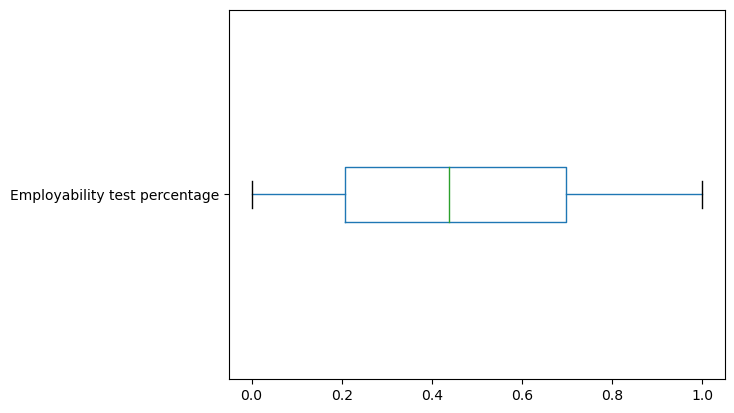

In [34]:
employability_one_hot.boxplot(column= 'Employability test percentage', vert= False, grid=False)
employability_one_hot['Employability test percentage'].describe()

In [35]:
employability_one_hot['Employability test percentage_f'] = pd.cut(employability_one_hot['Employability test percentage'], bins = [-1,0.697917,1], labels =[0,1])
prevalence = employability_one_hot['Employability test percentage_f'].value_counts()[1]/len(employability_one_hot['Employability test percentage_f'])
prevalence

0.25116279069767444

In [36]:
new_employability = employability_one_hot.drop(['Employability test percentage'],axis=1)

In [37]:
Train, Test = train_test_split(new_employability,  train_size = 55, stratify = new_employability['Employability test percentage_f'])
print(Train.shape)
print(Test.shape) 

(55, 24)
(160, 24)


In [39]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test['Employability test percentage_f'])
print(Train['Employability test percentage_f'].value_counts())
print(Tune['Employability test percentage_f'].value_counts())
print(Test['Employability test percentage_f'].value_counts())


Employability test percentage_f
0    41
1    14
Name: count, dtype: int64
Employability test percentage_f
0    30
1    10
Name: count, dtype: int64
Employability test percentage_f
0    30
1    10
Name: count, dtype: int64
